In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Set working directory to the current working directory
import os
os.chdir(os.getcwd())

width = 5
height = 5

# Analytical solution for the Styblinski-Tang function minimum
analytical_solution = -78.33233

# Load the results data
def load_results(filename="parametric_test_results.csv"):
    return pd.read_csv(filename)


def plot_precision_vs_population(results):
    methods = results['method'].unique()
    num_methods = len(methods)
    grid_cols = 3  # Number of columns in the grid
    grid_rows = math.ceil(num_methods / grid_cols)  # Number of rows needed

    # Create the figure and axes for subplots
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, grid_rows * 5), constrained_layout=True)
    sns.set_palette("Blues_d")  # Use a defined color palette

    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    # Variable to store legend handles/labels
    legend_handles = None
    legend_labels = None

    for i, method in enumerate(methods):
        ax = axes[i]
        simplified_method = method.replace("tournament_selection", "tournament") \
                                  .replace("roulette_selection", "roulette") \
                                  .replace("punnet_crossover", "punnet") \
                                  .replace("bit_crossover", "bit") \
                                  .replace("redefine_mutation", "redefine") \
                                  .replace("bit_mutation", "bit")
        
        scatter = sns.scatterplot(
            ax=ax,
            data=results[results['method'] == method],
            x="population_size",
            y="precision",  # Y-axis now shows precision
            hue="crossover_probability",  # Color represents crossover probability
            style="mutation_probability",  # Shape represents mutation probability
            size="tournament_fraction",  # Size represents tournament fraction
            sizes=(50, 200),  # Adjust point size range
            alpha=0.8
        )
        
        # Extract legend handles/labels from the first subplot
        if legend_handles is None and legend_labels is None:
            legend_handles, legend_labels = scatter.get_legend_handles_labels()
        
        ax.set_title(simplified_method, fontsize=10)
        ax.set_xlabel("Population Size")
        ax.set_ylabel("Precision")
        ax.set_xlim(results['population_size'].min(), results['population_size'].max() + 25)
        
        # Remove legend for individual plots
        ax.get_legend().remove()

    # Add a single legend in the bottom-right subplot
    if len(methods) < len(axes):  # Place legend in the last unused subplot
        legend_ax = axes[len(methods)]
    else:  # Otherwise, use the last subplot
        legend_ax = axes[-1]
    legend_ax.axis('off')  # Hide axis for the legend
    legend_ax.legend(legend_handles, legend_labels, loc='center', title="Legend", fontsize=10, title_fontsize=12)

    # Show the entire grid of plots
    plt.show()


# Generate plots for filtered execution time vs population size
def plot_filtered_execution_time_vs_population(results):
    methods = results['method'].unique()
    for method in methods:
        plt.figure(figsize=(6, 6))
        sns.set_palette("Blues_d")  # Use a defined color palette
        sns.scatterplot(
            data=results[results['method'] == method],
            x="population_size",
            y="execution_time",  # Y-axis now shows execution time
            hue="crossover_probability",  # Color represents crossover probability
            style="mutation_probability",  # Shape represents mutation probability
            size="tournament_fraction",  # Size represents tournament fraction
            sizes=(50, 200),  # Adjust point size range
            alpha=0.8
        )
        plt.title(f"{method}")
        plt.xlabel("Population Size")
        plt.xticks(range(int(results['population_size'].min()), 
                         int(results['population_size'].max()) + 50, 50))
        plt.xlim(results['population_size'].min() - 25, 
                 results['population_size'].max() + 25)
        plt.ylabel("Execution Time (s)")

        # Adjust legend placement and labels
        plt.legend(
            title="Legend:\n- Color: Crossover Probability\n- Shape: Mutation Probability\n- Size: Tournament Fraction",
            loc='upper left',
            #bbox_to_anchor=(1.05, 1),
            borderaxespad=0.5,
            fontsize=10,
            title_fontsize=12
        )

        plt.tight_layout(pad=2)
        plt.show()

# Plot convergence time vs different parameters
def plot_convergence_time(results):
     # Generate acronyms for methods
    results['method_acronym'] = results['method'].apply(
        lambda x: ''.join(word[0].upper() for word in x.replace("_selection", "")
                          .replace("_crossover", "").replace("_mutation", "").split(" - "))
    )

    plt.figure(figsize=(6, 6))
    sns.set_palette("Blues_d")  # Use blue color palette for markers

    sns.scatterplot(
        data=results,
        x="method_acronym",  # X-axis: method acronyms
        y="execution_time",  # Y-axis: execution time
        hue="mutation_probability",  # Color by mutation probability
        style="crossover_probability",  # Shape by crossover probability
        size="tournament_fraction",  # Size by tournament fraction
        sizes=(50, 200),  # Adjust point size range
        alpha=0.8  # Adjust marker transparency for better readability
    )

    plt.title("Execution Time vs Method Combination)")
    plt.xlabel("Method Combination")
    plt.ylabel("Execution Time (s)")

    # Rotate X-axis labels for readability
    plt.xticks(rotation=45, ha="right", fontsize=9)

    # Adjust legend placement and content
    plt.legend(
        title="Legend:",
        loc='upper right',
        #bbox_to_anchor=(1.05, 1),  # Place legend outside the plot
        borderaxespad=0.5,
        fontsize=9,
        title_fontsize=10
    )

    plt.tight_layout()  # Adjust layout for aesthetics
    plt.show()

# Plot Final Fitness vs Mutation Probability
def plot_fitness_vs_mutation(results):
    plt.figure(figsize=(width, height))
    sns.set_palette("Blues")
    sns.boxplot(data=results, x="mutation_probability", y="precision")
    plt.title("Final Fitness vs Mutation Probability")
    plt.xlabel("Mutation Probability")
    plt.ylabel("Solution Precision")
    plt.axhline(1, linestyle="--", color="dodgerblue", label="Analytical Solution")
    
    legend_handles = [
        plt.Line2D([0], [0], color="dodgerblue", linestyle="--", label="Analytical Solution"),
        plt.Line2D([0], [0], marker="D", color="w", markerfacecolor="black", markersize=6, label="Outliers"),
        plt.Line2D([0], [0], color="skyblue", lw=6, label="Interquartile Range (IQR)"),
        plt.Line2D([0], [0], color="black", lw=2, label="Median Line"),
    ]
    plt.legend(handles=legend_handles, loc='lower left', title="Legend")
    plt.figtext(0.5, -0.05, "Boxplots show median, quartiles, and outliers (⧫)", ha='center', color="gray")
    plt.show()

def plot_fitness_vs_tournament(results):
    plt.figure(figsize=(width, height))
    sns.set_palette("Blues")
    sns.boxplot(data=results, x="tournament_fraction", y="precision")
    plt.title("Final Fitness vs Mutation Probability")
    plt.xlabel("Tournament Fraction")
    plt.ylabel("Solution Precision")
    plt.axhline(1, linestyle="--", color="dodgerblue", label="Analytical Solution")
    
    legend_handles = [
        plt.Line2D([0], [0], color="dodgerblue", linestyle="--", label="Analytical Solution"),
        plt.Line2D([0], [0], marker="D", color="w", markerfacecolor="black", markersize=6, label="Outliers"),
        plt.Line2D([0], [0], color="skyblue", lw=6, label="Interquartile Range (IQR)"),
        plt.Line2D([0], [0], color="black", lw=2, label="Median Line"),
    ]
    plt.legend(handles=legend_handles, loc='lower left', title="Legend")
    plt.figtext(0.5, -0.05, "Boxplots show median, quartiles, and outliers (⧫)", ha='center', color="gray")
    plt.show()
    
# Plot Final Fitness vs Crossover Probability
def plot_fitness_vs_crossover(results):
    plt.figure(figsize=(width, height))
    sns.set_palette("Blues")
    sns.boxplot(data=results, x="crossover_probability", y="precision")
    plt.title("Final Fitness vs Crossover Probability")
    plt.xlabel("Crossover Probability")
    plt.ylabel("Solution Precision")
    plt.axhline(1, linestyle="--", color="dodgerblue", label="Analytical Solution")
    
    legend_handles = [
        plt.Line2D([0], [0], color="dodgerblue", linestyle="--", label="Analytical Solution"),
        plt.Line2D([0], [0], marker="D", color="w", markerfacecolor="black", markersize=6, label="Outliers"),
        plt.Line2D([0], [0], color="skyblue", lw=6, label="Interquartile Range (IQR)"),
        plt.Line2D([0], [0], color="black", lw=2, label="Median Line"),
    ]
    plt.legend(handles=legend_handles, loc='lower left', title="Legend")
    plt.figtext(0.5, -0.05, "Boxplots show median, quartiles, and outliers (⧫)", ha='center', color="gray")
    plt.show()

# Plot Final Fitness vs Population Size
def plot_fitness_vs_population_size(results):
    plt.figure(figsize=(width, height))
    sns.set_palette("Blues")
    boxplot = sns.boxplot(data=results, x="population_size", y="precision", color="skyblue")
    plt.title("Final Fitness vs Initial Population Size")
    plt.xlabel("Population Size")
    plt.ylabel("Solution Precision")
    plt.axhline(1, linestyle="--", color="dodgerblue", label="Analytical Solution")
    
    legend_handles = [
        plt.Line2D([0], [0], color="dodgerblue", linestyle="--", label="Analytical Solution"),
        plt.Line2D([0], [0], marker="D", color="w", markerfacecolor="black", markersize=6, label="Outliers"),
        plt.Line2D([0], [0], color="skyblue", lw=6, label="Interquartile Range (IQR)"),
        plt.Line2D([0], [0], color="black", lw=2, label="Median Line"),
    ]
    plt.legend(handles=legend_handles, loc='lower left', title="Legend")

    # plt.figtext(0.5, -0.1, "Explanation:\n"
                            # "- Blue dotted line: Analytical solution for the global minimum\n"
                            # "- Outliers (⧫): Values outside 1.5 times the IQR from the quartiles\n"
                            # "- Interquartile Range (IQR): Contains the middle 50% of data\n"
                            # "- Median Line: The middle value within the IQR", ha='center', color="gray")
    plt.show()


In [2]:
results = load_results("parametric_test_results.csv")
print(results.describe())   

       population_size  max_iterations  crossover_probability  \
count       864.000000           864.0             864.000000   
mean        250.000000            50.0               0.533333   
std         111.868156             0.0               0.249588   
min         100.000000            50.0               0.200000   
25%         175.000000            50.0               0.200000   
50%         250.000000            50.0               0.600000   
75%         325.000000            50.0               0.800000   
max         400.000000            50.0               0.800000   

       mutation_probability  tournament_fraction  final_iterations  \
count            864.000000           864.000000        864.000000   
mean               0.533333             0.533333         49.051620   
std                0.249588             0.249588          1.834249   
min                0.200000             0.200000         36.400000   
25%                0.200000             0.200000         48.8000

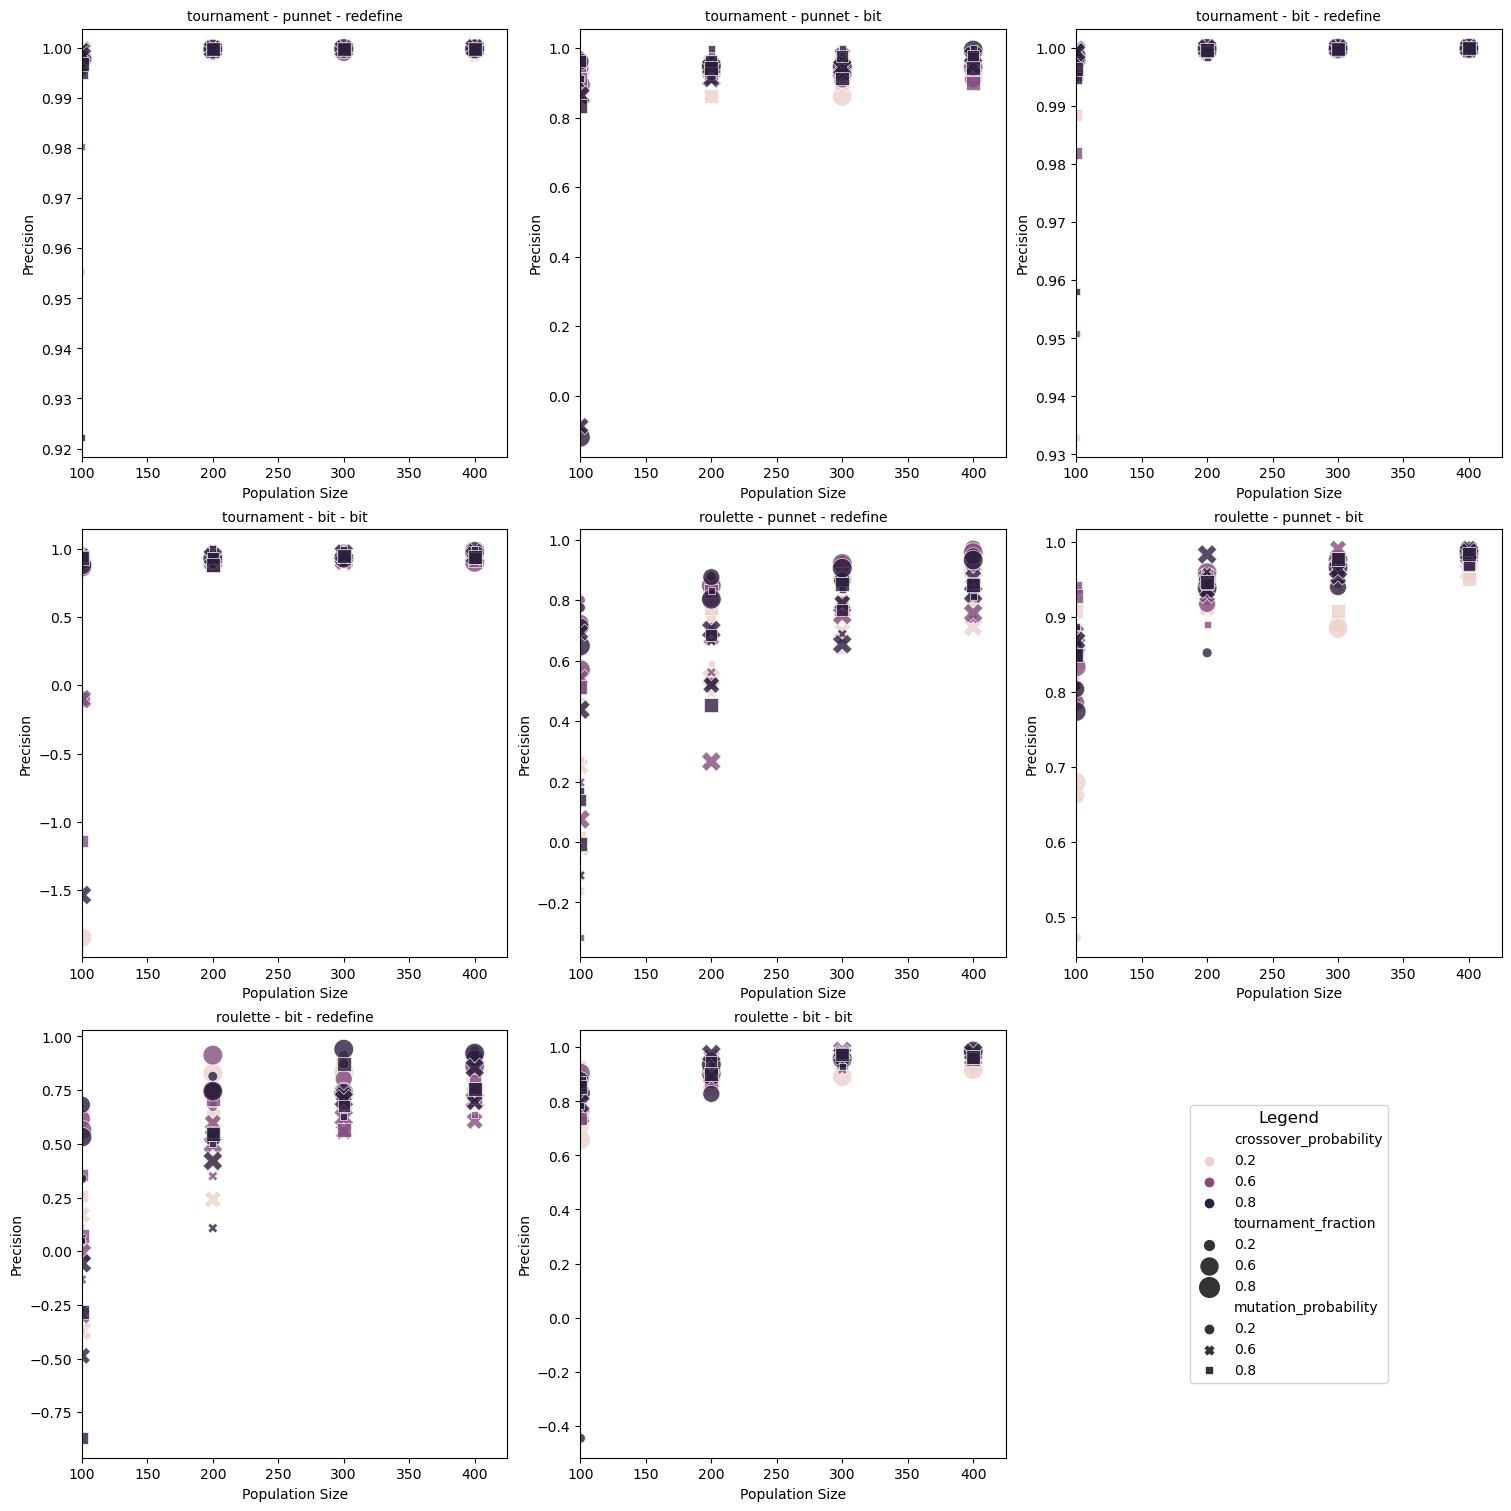

In [3]:
# Analytical solution for Styblinski-Tang function minimum
analytical_solution = -78.33233
# Calculate precision (absolute difference from analytical solution) and add it to the dataset
results['precision'] = 1 - abs(results['final_fitness'] - analytical_solution)
# Generate the detailed precision plots for each method combination
plot_precision_vs_population(results)

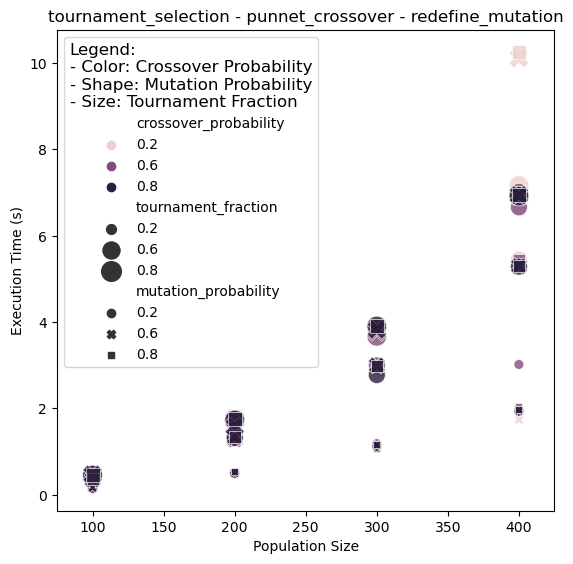

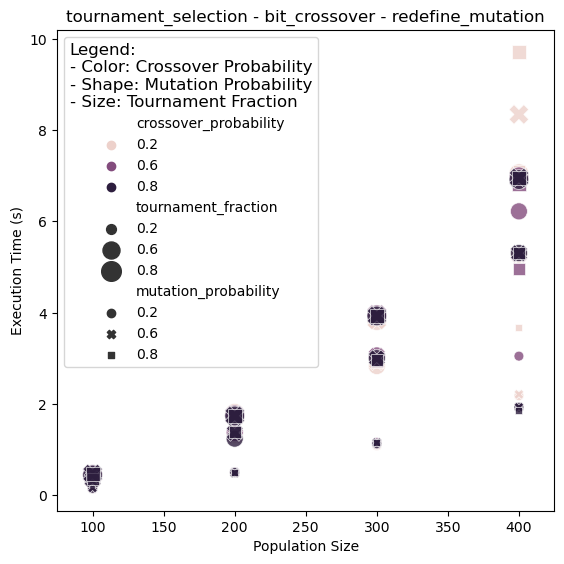

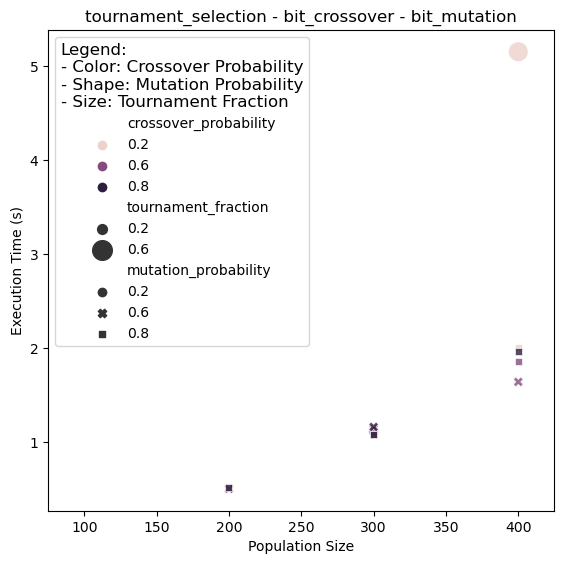

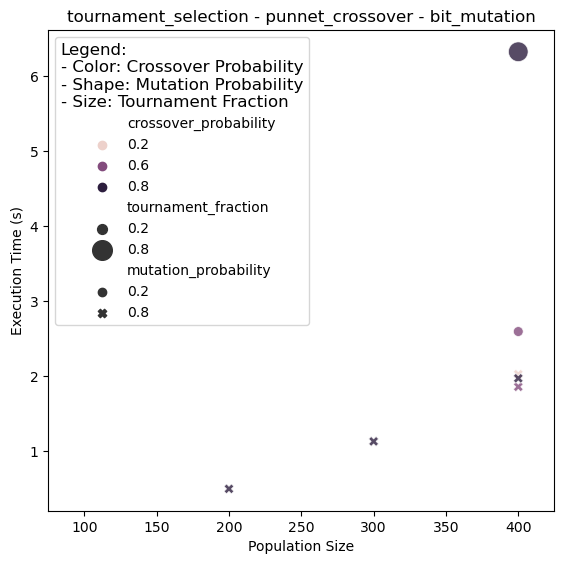

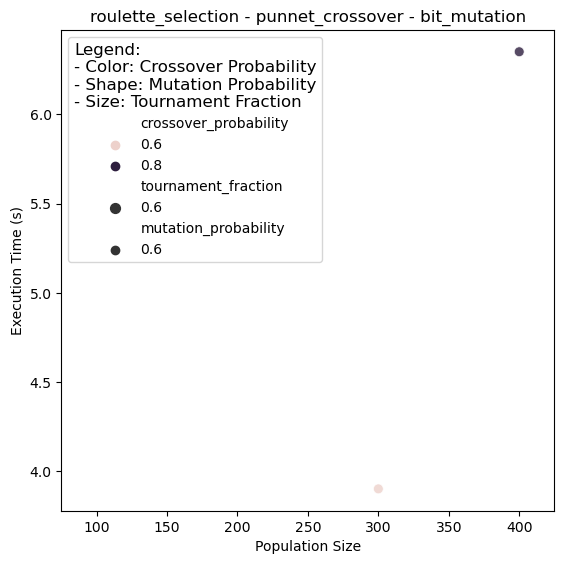

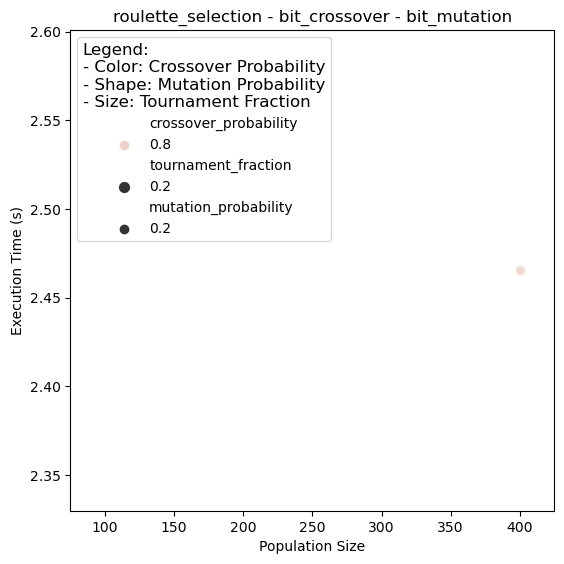

In [4]:
# Filter the dataset for results with precision below a certain threshold
precision_threshold = 0.99  # Set the desired threshold
results = results[results['precision'] >= precision_threshold] 
# Generate the filtered execution time plots for each method combination
plot_filtered_execution_time_vs_population(results)


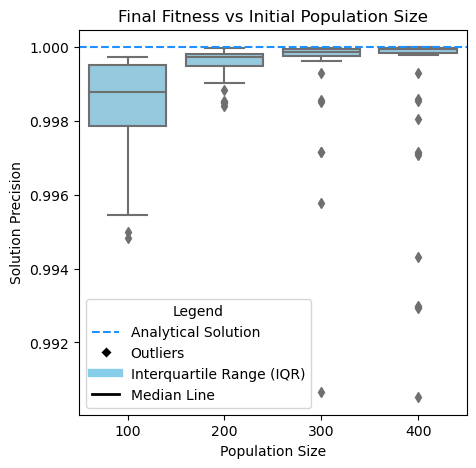

In [5]:
# Plot fitness vs population size
plot_fitness_vs_population_size(results)

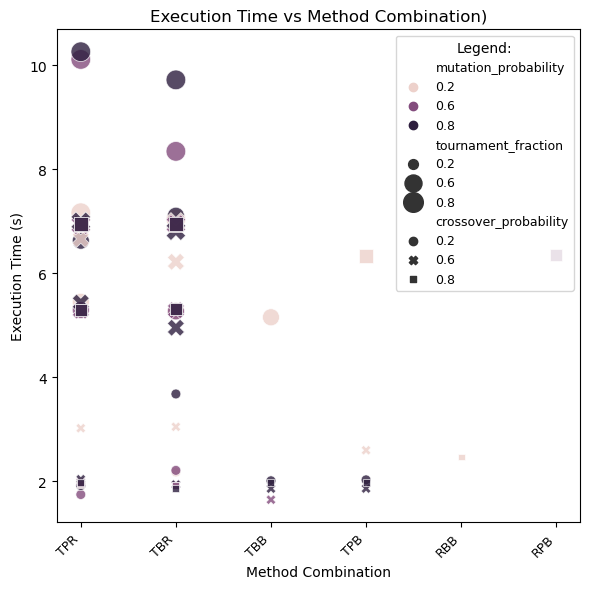

In [6]:
pop_to_study = 400 # population set
results = results[results['population_size'] == pop_to_study]

# Plot convergence time vs parameters
plot_convergence_time(results)

In [7]:
# Get the top 5% of execution times
exe_time_limit = results['execution_time'].quantile(0.2)
display(exe_time_limit)
results = results[results['execution_time'] <= exe_time_limit]

1.9714921951293944

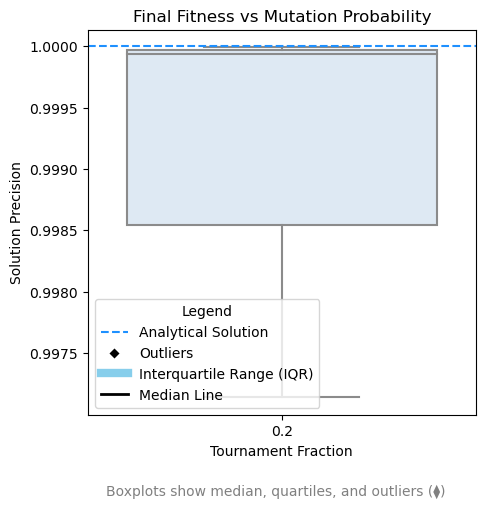

In [8]:
# Plot fitness vs mutation probability
plot_fitness_vs_tournament(results)

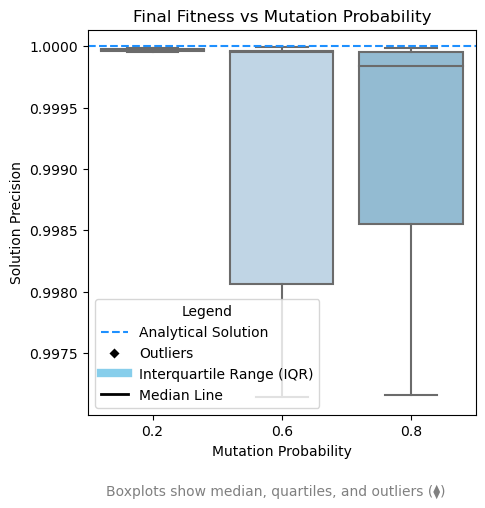

In [9]:

# Plot fitness vs mutation probability
plot_fitness_vs_mutation(results)

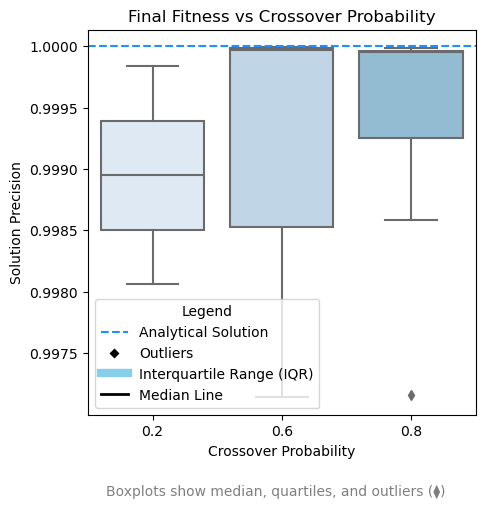

In [10]:
# Plot fitness vs crossover probability
plot_fitness_vs_crossover(results)

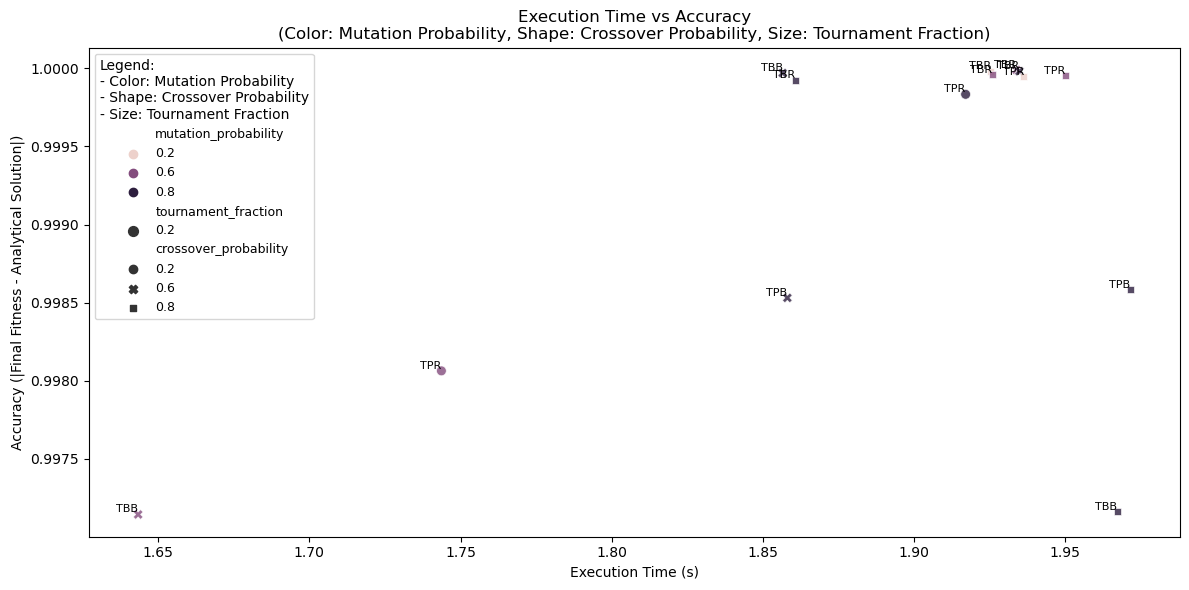

In [11]:
#save results to csv
results.to_csv("filtered_results.csv", index=False)


def plot_execution_time_vs_accuracy(results):
    # Generate acronyms for methods
    results['method_acronym'] = results['method'].apply(
        lambda x: ''.join(word[0].upper() for word in x.replace("_selection", "")
                          .replace("_crossover", "").replace("_mutation", "").split(" - "))
    )

    plt.figure(figsize=(12, 6))
    sns.set_palette("Blues_d")  # Use blue color palette for markers

    # Scatterplot
    scatter = sns.scatterplot(
        data=results,
        x="execution_time",  # X-axis: execution time
        y="precision",  # Y-axis: accuracy of the solution (precision)
        hue="mutation_probability",  # Color by mutation probability
        style="crossover_probability",  # Shape by crossover probability
        size="tournament_fraction",  # Size by tournament fraction
        sizes=(50, 200),  # Adjust point size range
        alpha=0.8  # Adjust marker transparency for better readability
    )

    # Add labels close to each point
    for i, row in results.iterrows():
        plt.text(
            row['execution_time'], row['precision'], row['method_acronym'],
            fontsize=8, color='black', ha='right', va='bottom'
        )

    # Titles and labels
    plt.title("Execution Time vs Accuracy\n(Color: Mutation Probability, Shape: Crossover Probability, Size: Tournament Fraction)")
    plt.xlabel("Execution Time (s)")
    plt.ylabel("Accuracy (|Final Fitness - Analytical Solution|)")

    # Adjust legend placement and content
    plt.legend(
        title="Legend:\n- Color: Mutation Probability\n- Shape: Crossover Probability\n- Size: Tournament Fraction",
        loc='upper left',
        borderaxespad=0.5,
        fontsize=9,
        title_fontsize=10
    )

    # Adjust layout
    plt.tight_layout()  # Adjust layout for aesthetics
    plt.show()


plot_execution_time_vs_accuracy(results)